The following notebook compares the XGBooost Feature Importance to the Scikit-Learn GBC and then takes the top 10 features of the GBC classifier and plots the possible 2 feature combinations of the top 10 most important features according to the GBC feature importance algorithm. 

If there is strong disagreeance between the XGBoost and GBC importance rankings perhaps both will be used. 

In [65]:
import pandas as pd
import numpy as np
from sklearn import cross_validation, metrics   
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import operator 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier 
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
trainData = pd.read_csv('1e7data_train.csv', index_col=0)
testData = pd.read_csv('1e7data_holdout.csv', index_col=0)
df = trainData
dftest = testData

feature_names = ['daOverRH1', 'daOverRH2', 'mindaOverRH', 'maxdaOverRH','norm_std_a1',
                 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1',
                'norm_std_a2', 'norm_std_window10_a2', 'norm_max_window10_a2', 'norm_max_a2',
                'norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3', 
                'avg_ecross1', 'std_ecross1', 'min_ecross1', 'max_ecross1', 
                'avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2',
                'avg_ecross3', 'max_ecross3', 'min_ecross3', 'std_ecross3', 
                'norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope', 'norm_LyapunovTime']

X_train = df[feature_names]


y_train = df['Stable']
X_test = dftest[feature_names]

X_train = X_train.replace(np.nan, -999)
X_train = X_train.replace(np.inf, -999)

X_test = X_test.replace(np.nan, -999)
X_test = X_test.replace(np.inf, -999)

model0 = XGBClassifier(colsample_bylevel=1, colsample_bytree=1,
                         n_estimators=5000, gamma=0,
                         max_delta_step=0, missing=None, 
                         reg_alpha=0, reg_lambda=1,
                         scale_pos_weight=1, seed=27,
                        learning_rate=.002, max_depth=8,
                        subsample=.5, min_child_weight=1.2, 
                        objective='binary:logistic', nthread=-1)

model0.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.002, max_delta_step=0, max_depth=8,
       min_child_weight=1.2, missing=None, n_estimators=5000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.5)

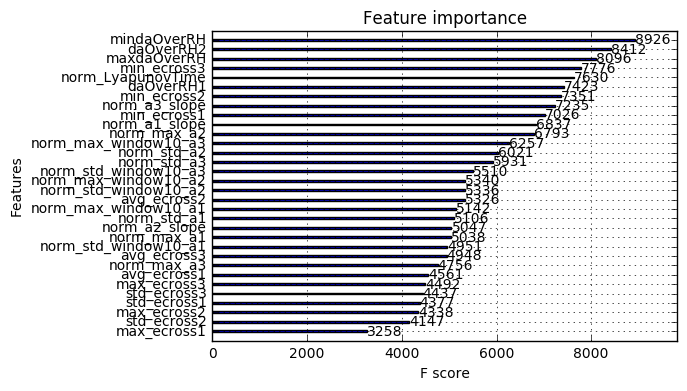

In [66]:
xgb.plot_importance(model0)

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(loss='deviance', learning_rate=0.002, n_estimators=5000,
                                  subsample=.5,  min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=8,
                                  init=None, random_state=42, 
                                  max_leaf_nodes=8, warm_start=False, max_features=.5)

model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.002, loss='deviance', max_depth=8,
              max_features=0.5, max_leaf_nodes=8, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              presort='auto', random_state=42, subsample=0.5, verbose=0,
              warm_start=False)

In [68]:
model.feature_importances_ # scale the features to make them have same range as xgboost feature values

array([ 0.0388329 ,  0.05759063,  0.072286  ,  0.05826035,  0.02562932,
        0.03007809,  0.02275044,  0.01924226,  0.07533323,  0.02755462,
        0.02467134,  0.09419709,  0.04130743,  0.02860587,  0.02392882,
        0.02637065,  0.01633856,  0.01681544,  0.01963788,  0.01408978,
        0.0236756 ,  0.02109195,  0.03782474,  0.03635843,  0.02385965,
        0.02583258,  0.03519768,  0.01735667,  0.        ,  0.        ,
        0.        ,  0.04528201])

Note that I'm not sure what occured for the values    0.        , my intuition is that it may be a floating point error. 

In [69]:
vals = model.feature_importances_*100000 # scale the features to make them have same range as xgboost feature values

print vals

[ 3883.28987814  5759.06345225  7228.60002038  5826.03471017  2562.93151719
  3007.80947367  2275.04385406  1924.22593308  7533.32294771  2755.46150258
  2467.13350865  9419.70893798  4130.74337948  2860.58669248  2392.88198317
  2637.06527907  1633.85561454  1681.54382563  1963.78843482  1408.97834335
  2367.55961857  2109.19537348  3782.4744842   3635.84287694  2385.96505804
  2583.25758364  3519.76772504  1735.66708064     0.             0.             0.
  4528.20091102]


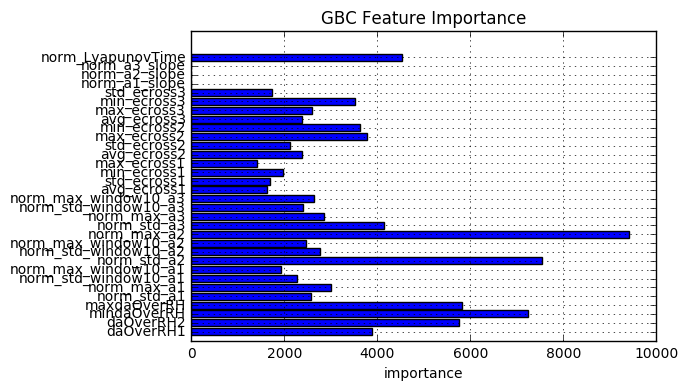

In [70]:
from pylab import *

vals = model.feature_importances_*100000
pos = arange(len(vals)) + 1 # centres the graph along y 

figure(1) # gives the figure a placeholder
barh(pos, vals, align='center') 
yticks(pos, np.array(feature_names))
xlabel('importance')
title('GBC Feature Importance')
grid(True)
show()


In [76]:
vals = model.feature_importances_*100000

print feature_names

print vals

['daOverRH1', 'daOverRH2', 'mindaOverRH', 'maxdaOverRH', 'norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1', 'norm_std_a2', 'norm_std_window10_a2', 'norm_max_window10_a2', 'norm_max_a2', 'norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3', 'avg_ecross1', 'std_ecross1', 'min_ecross1', 'max_ecross1', 'avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2', 'avg_ecross3', 'max_ecross3', 'min_ecross3', 'std_ecross3', 'norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope', 'norm_LyapunovTime']
[ 3883.28987814  5759.06345225  7228.60002038  5826.03471017  2562.93151719
  3007.80947367  2275.04385406  1924.22593308  7533.32294771  2755.46150258
  2467.13350865  9419.70893798  4130.74337948  2860.58669248  2392.88198317
  2637.06527907  1633.85561454  1681.54382563  1963.78843482  1408.97834335
  2367.55961857  2109.19537348  3782.4744842   3635.84287694  2385.96505804
  2583.25758364  3519.76772504  1735.66708064     0.             0.          

In [92]:
val_dict = dict(zip(feature_names, vals))
sorted_vals = sorted(val_dict.items(), key = operator.itemgetter(1))

feature_names_sorted = []
for scores in sorted_vals: 
    feature_names_sorted.append(scores[0])

vals_sorted = sorted(vals)

print feature_names_sorted
print vals_sorted

['norm_a1_slope', 'norm_a3_slope', 'norm_a2_slope', 'max_ecross1', 'avg_ecross1', 'std_ecross1', 'std_ecross3', 'norm_max_window10_a1', 'min_ecross1', 'std_ecross2', 'norm_std_window10_a1', 'avg_ecross2', 'avg_ecross3', 'norm_std_window10_a3', 'norm_max_window10_a2', 'norm_std_a1', 'max_ecross3', 'norm_max_window10_a3', 'norm_std_window10_a2', 'norm_max_a3', 'norm_max_a1', 'min_ecross3', 'min_ecross2', 'max_ecross2', 'daOverRH1', 'norm_std_a3', 'norm_LyapunovTime', 'daOverRH2', 'maxdaOverRH', 'mindaOverRH', 'norm_std_a2', 'norm_max_a2']
[0.0, 0.0, 0.0, 1408.9783433470543, 1633.8556145440327, 1681.543825632473, 1735.6670806441939, 1924.2259330760403, 1963.7884348183479, 2109.1953734798994, 2275.0438540643554, 2367.5596185718141, 2385.9650580432408, 2392.8819831655219, 2467.1335086460576, 2562.9315171908756, 2583.2575836432179, 2637.0652790748181, 2755.4615025760454, 2860.5866924835004, 3007.8094736728513, 3519.7677250444649, 3635.8428769408006, 3782.4744842025007, 3883.2898781438994, 41

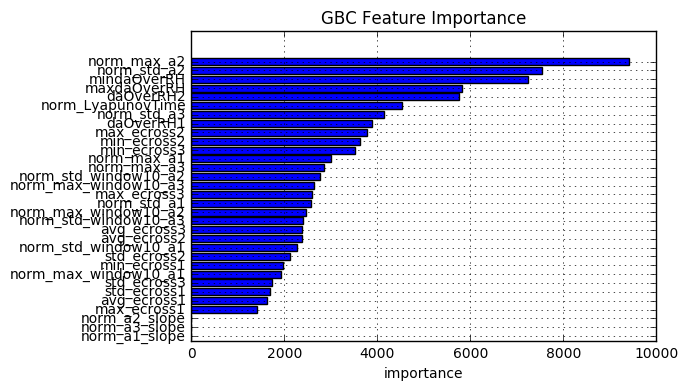

In [93]:
points = vals_sorted

pos = arange(len(vals_sorted)) + .5 # centres the graph along y 

figure(1) # gives the figure a placeholder in memory
barh(pos, vals_sorted, align='center') 
yticks(pos, feature_names_sorted)
xlabel('importance')
title('GBC Feature Importance')
grid(True)
show()

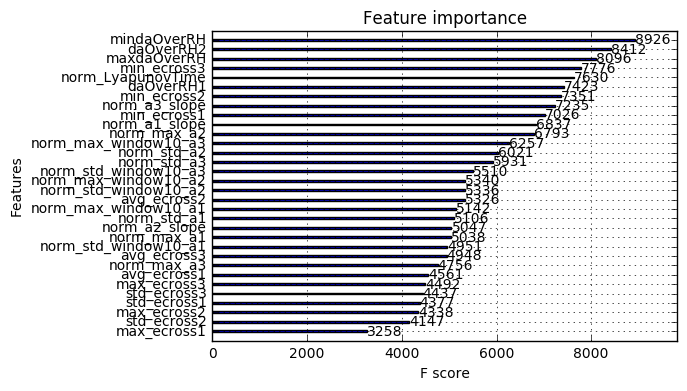

In [91]:
xgb.plot_importance(model0)